In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
#Create training and test set

train=pd.read_csv('/content/train_set.csv')
x=train.iloc[:,:-1]
y=train['NObeyesdad']
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=123)

In [21]:
#Encoding all categorical variables into numerical representations

x_train['Gender']=x_train['Gender'].map({'Male':0,'Female':1})
x_train[['CALC','CAEC']]=x_train[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
le=LabelEncoder()
x_train['MTRANS']=le.fit_transform(x_train['MTRANS'])

x_val['Gender']=x_val['Gender'].map({'Male':0,'Female':1})
x_val[['CALC','CAEC']]=x_val[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_val[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_val[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
le=LabelEncoder()
x_val['MTRANS']=le.fit_transform(x_val['MTRANS'])

In [16]:
#Creating a Random Forest model and using KFold and GridSearch to find the best number of estimators and depth of tree.

rf=RandomForestClassifier(random_state=123)

#Number of estimators between 50 and 500, with a difference of 50 for each step. Depth is 5-10.
param={'n_estimators':range(50,610,50),'max_depth':range(2,6)}
grid=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print("Best Model:",grid.best_estimator_,"\nScore:",grid.best_score_)

Best Model: RandomForestClassifier(max_depth=5, n_estimators=500, random_state=123) 
Score: 0.8712551741309017


The best model was found to be a maximum depth of 5 with 600 estimators. A limitation to this is that further depth of 10 or greater would yield higher accuracy, but this would sacrifice a readable plot, so accuracy was sacrificed for readability.

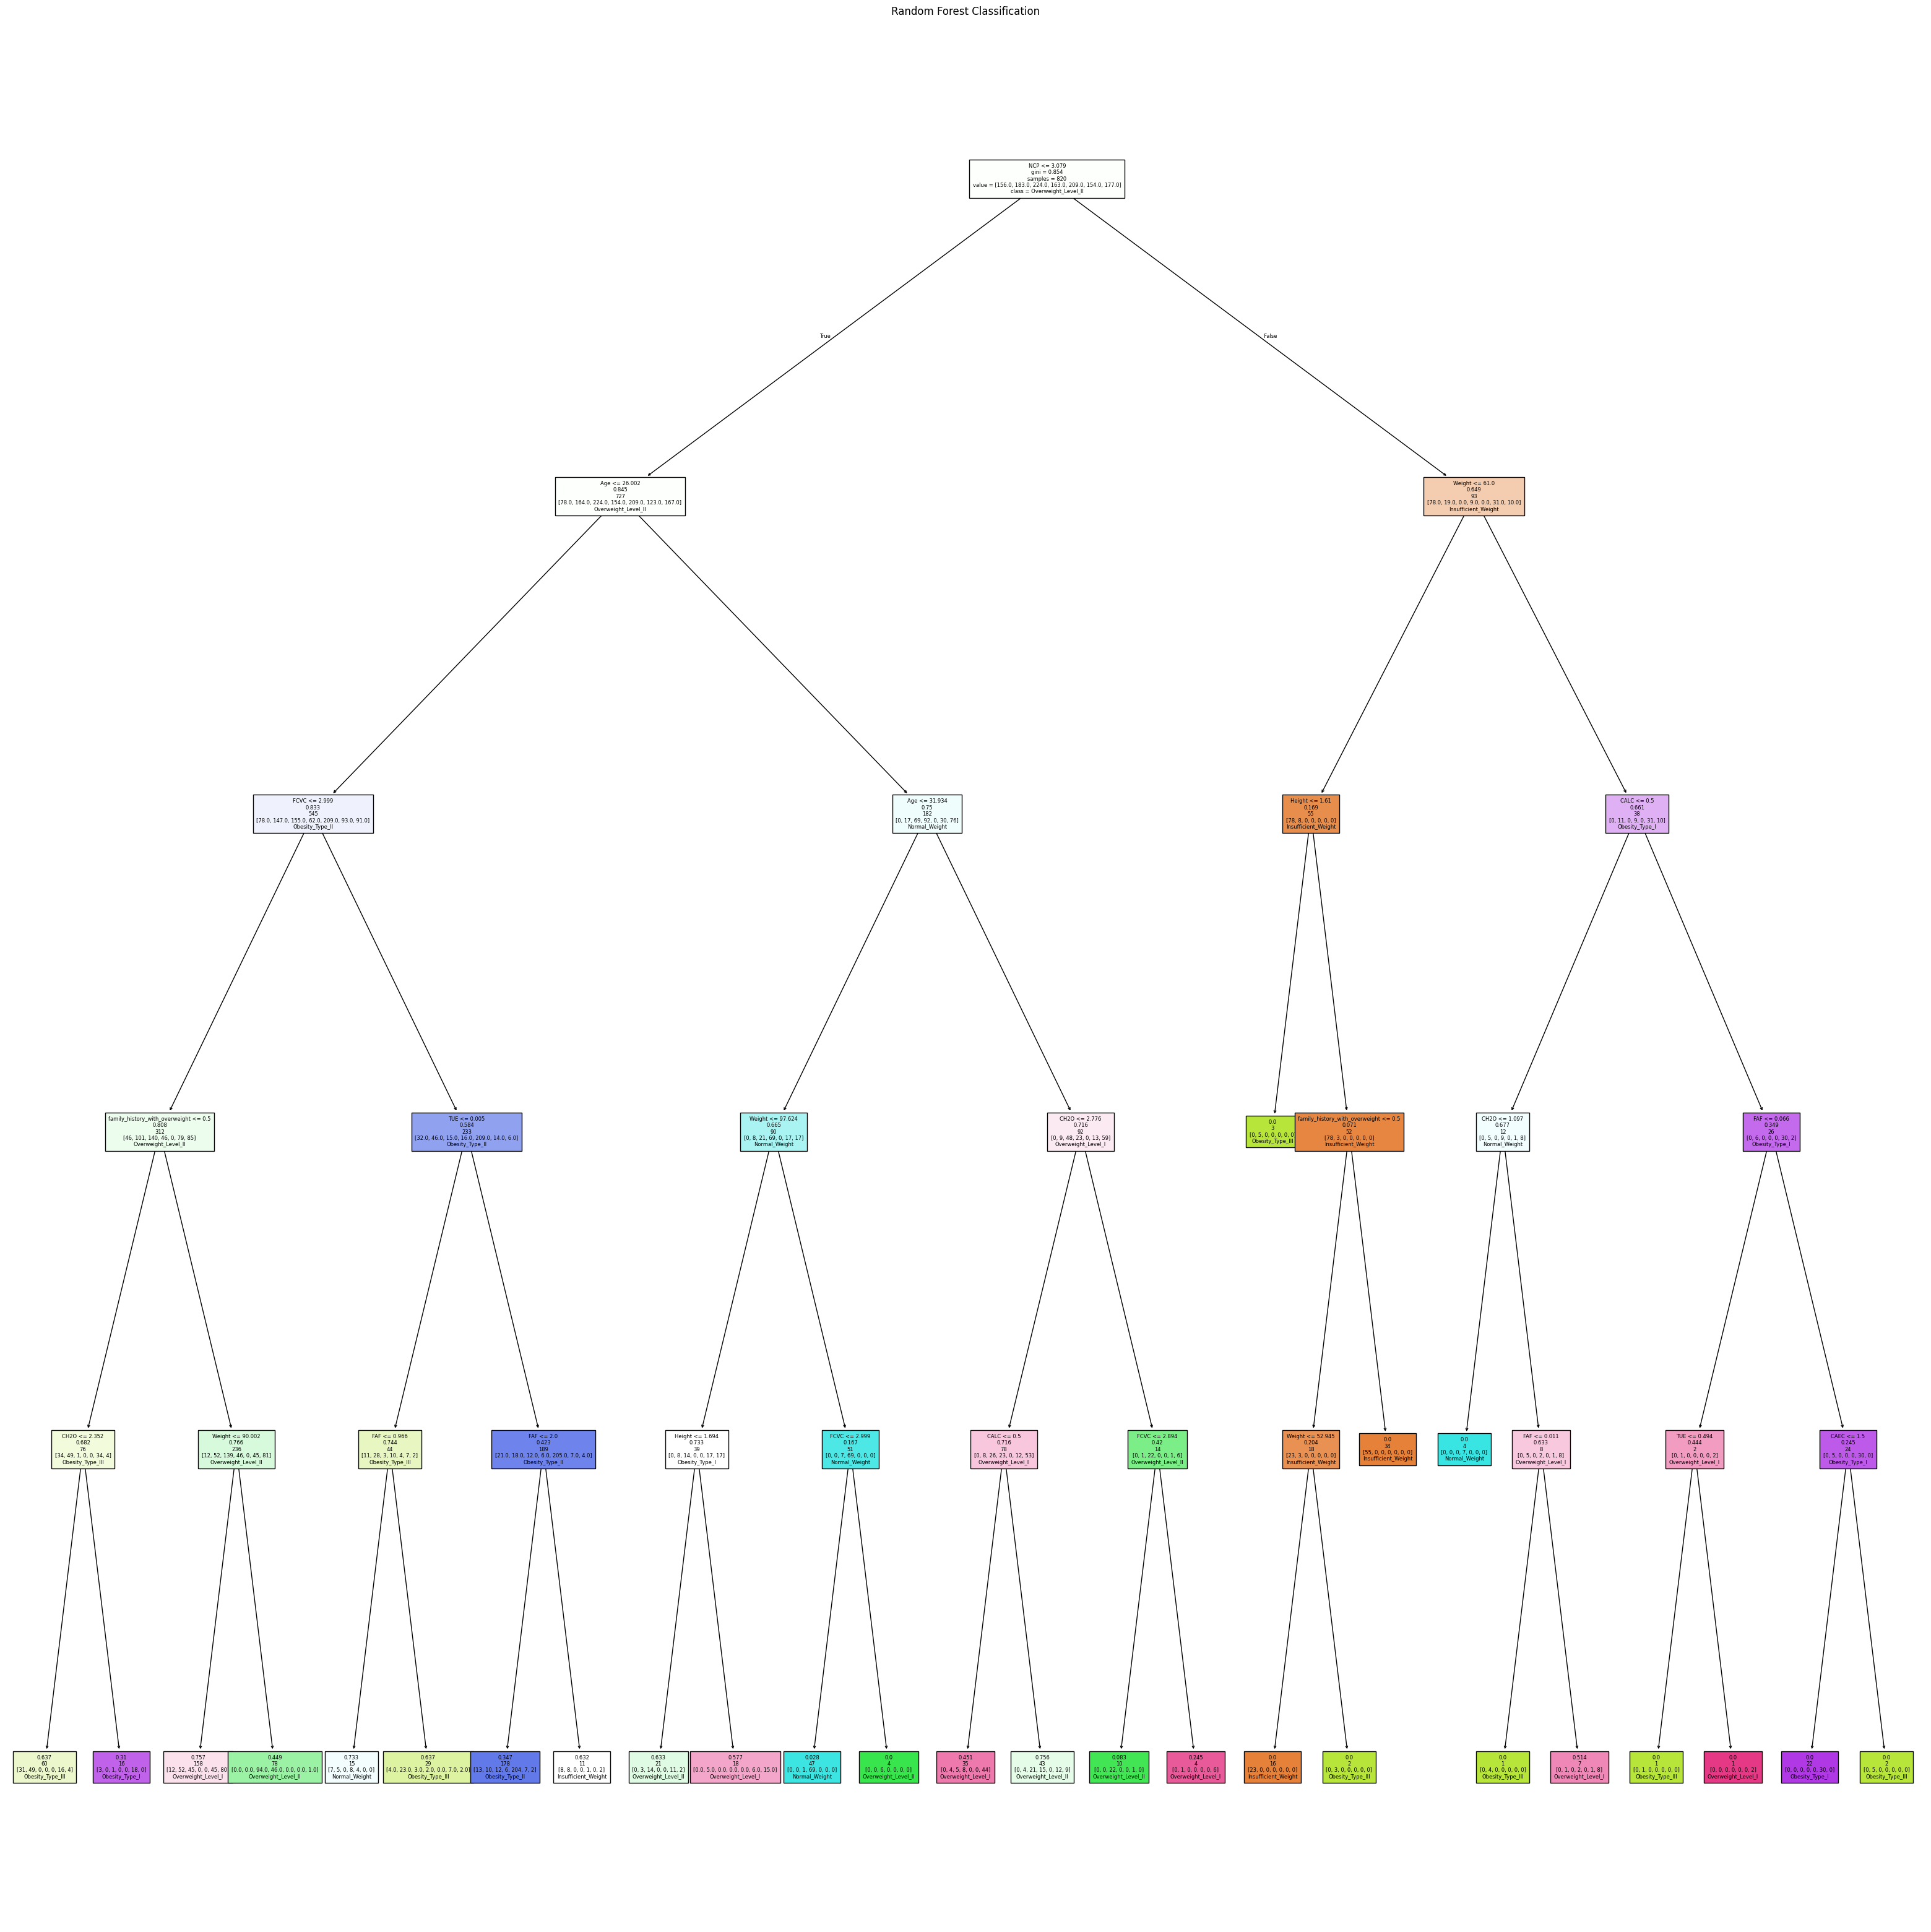

In [17]:
#Plotting the tree to see a physical representation using one of the examples

plt.figure(figsize=(40,40))
estimator=grid.best_estimator_.estimators_[0]
plot_tree(estimator,feature_names=x_train.columns.tolist(),class_names=y_train.unique().tolist(),filled=True,fontsize=6,label='root')
plt.title("Random Forest Classification")
plt.savefig("Forest")
plt.show()

<Figure size 1000x1000 with 0 Axes>

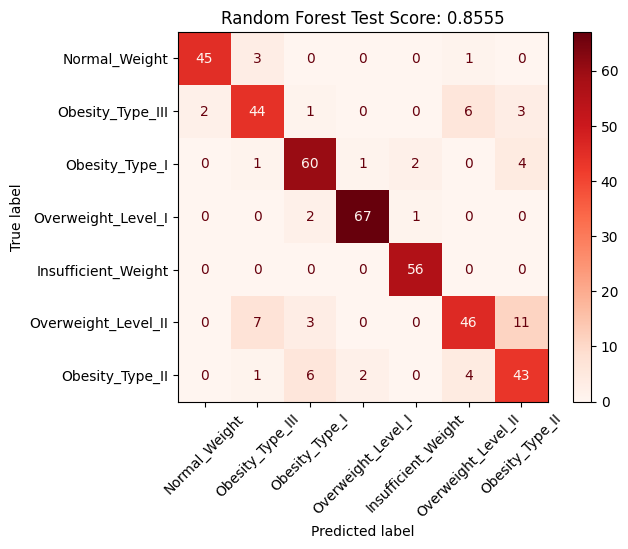

In [22]:
plt.figure(figsize=(10,10))
disp=ConfusionMatrixDisplay(confusion_matrix(y_val,grid.predict(x_val)),display_labels=y_val.unique())
disp.plot(cmap=plt.cm.Reds)
plt.xticks(rotation=45)
plt.title(f"Random Forest Test Score: {grid.score(x_val,y_val):.4f}")
plt.savefig("ForestConfusionMatrix")
plt.show()